https://archive.ics.uci.edu/ml/datasets/Iris

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
iris_data = pd.read_csv('iris.data.txt', header=None)
iris_data.columns = ['Sepal length','Sepal width', 'Petal length', 'Petal width','Class']

In [4]:
iris_data.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = iris_data[['Sepal length','Sepal width', 'Petal length', 'Petal width']]
y = iris_data['Class']

In [6]:
# build train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 100)

In [7]:
# Now it's time to train a Support Vector Machine Classifier. 
# Call the SVC() model from sklearn and fit the model to the training data.
from sklearn.svm import SVC
model=SVC(C=1, kernel='rbf', tol=0.001)
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# Now get predictions from the model and create a confusion matrix and a classification report.
pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, pred))

[[22  0  0]
 [ 0 15  0]
 [ 0  0 23]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        23

    avg / total       1.00      1.00      1.00        60



Accuracy score is:  1.0


In [13]:
model_2=SVC(C=0.5, kernel='rbf', tol=0.9)
model_2.fit(X_train, y_train)

pred_2 = model_2.predict(X_test)

print(confusion_matrix(y_test, pred_2))
print('\n')
print(classification_report(y_test, pred_2))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, pred_2))

[[22  0  0]
 [ 0 15  0]
 [ 0  0 23]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        23

    avg / total       1.00      1.00      1.00        60



Accuracy score is:  1.0


In [8]:
SVC?

In [36]:
# GridSearchCV
from sklearn.utils import shuffle

X=iris_data.drop('Class', axis=1)
y=iris_data['Class']

print('Before shuffle: ',y[0:20])

X,y = shuffle(X,y, random_state=0)

print("After shuffle: ", y[0:20])

Before shuffle:  0     Iris-setosa
1     Iris-setosa
2     Iris-setosa
3     Iris-setosa
4     Iris-setosa
5     Iris-setosa
6     Iris-setosa
7     Iris-setosa
8     Iris-setosa
9     Iris-setosa
10    Iris-setosa
11    Iris-setosa
12    Iris-setosa
13    Iris-setosa
14    Iris-setosa
15    Iris-setosa
16    Iris-setosa
17    Iris-setosa
18    Iris-setosa
19    Iris-setosa
Name: Class, dtype: object
After shuffle:  114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
Name: Class, dtype: object


In [37]:
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',cv=3, verbose=1, refit=True )
grid.fit(X, y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [38]:
# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean cross-validated score of the best_estimator:  0.9933333333333333
The number of cross-validation splits (folds/iterations):  3


In [41]:
# Another optition for shuffle is to use cv=KFold, we get 98% accuracy
from sklearn.model_selection import KFold

X=iris_data.drop(['Class'], axis=1)
y=iris_data['Class']

# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['rbf']}

from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',
                  cv=KFold(n_splits=3, shuffle=True, random_state=0), verbose=1, refit=True )
grid.fit(X, y)

# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean cross-validated score of the best_estimator:  0.98
The number of cross-validation splits (folds/iterations):  3


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.2s finished


In [14]:
#Classification methods

In [23]:
iris = pd.read_csv("iris.data.txt") #load the dataset
print(iris[0:2])

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa


In [28]:
X = iris_data.iloc[:,0:4] # ignore first column which is row Id
y = iris_data.iloc[:,4:5] # Classification on the 'Species'

In [41]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#fig = plt.figure(figsize=(15,20))

def run_model(model, alg_name, plot_index):
    fig = plt.figure(figsize=(15,20))
    # build the model on training data
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    # calculate the accuracy score
    accuracy =  accuracy_score(y_test, y_pred) * 100

    # Compare the prediction result with ground truth
    color_code = {'Iris-virginica':'red', 'Iris-setosa':'blue', 'Iris-versicolor':'green'}

    # plt.figure(plot_index)
    ax = fig.add_subplot(4,2,plot_index) 
    colors = [color_code[x] for x in y_test.iloc[:,0]]
    ax.scatter(X_test.iloc[:,0], X_test.iloc[:,3], color=colors, marker='.', label='Circle = Ground truth')
    colors = [color_code[x] for x in y_pred]
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:,3], color=colors, marker='o', facecolors='none', label='Dot = Prediction')

    #plt.axes([0.65, 0.65, 0.2, 0.2])
    ax.legend(loc="lower right")
    # manually set legend color to black
    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    leg.legendHandles[1].set_facecolors('none')

    ax.set_title(alg_name + ". Accuracy: " + str(accuracy))



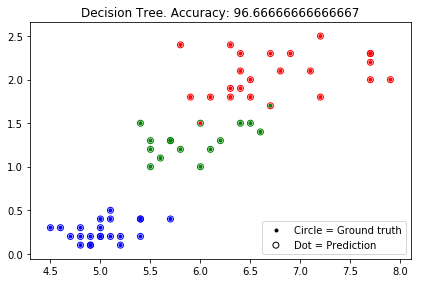

In [42]:
# ---- Decision Tree -----------
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
run_model(model, "Decision Tree", 1)

C:\Users\liuda\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\liuda\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


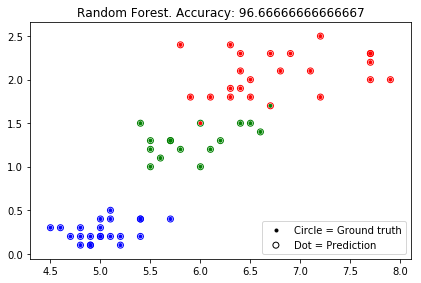

In [43]:
# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest", 2)

C:\Users\liuda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\liuda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\liuda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


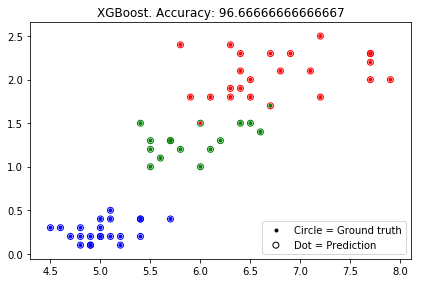

In [47]:
# ----- xgboost ------------
!pip install xgboost
#'pip install xgboost' or https://stackoverflow.com/questions/33749735/how-to-install-xgboost-package-in-python-windows-platform/39811079#39811079

from xgboost import XGBClassifier

model = XGBClassifier()
run_model(model, "XGBoost", 3)

C:\Users\liuda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


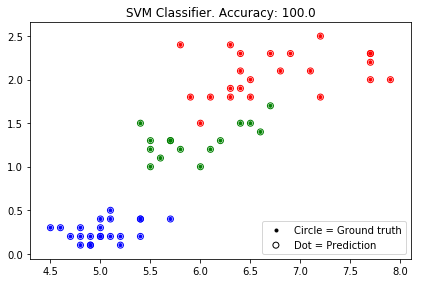

In [48]:
# ------ SVM Classifier ----------------
from sklearn.svm import SVC
model = SVC()
run_model(model, "SVM Classifier", 4)


C:\Users\liuda\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


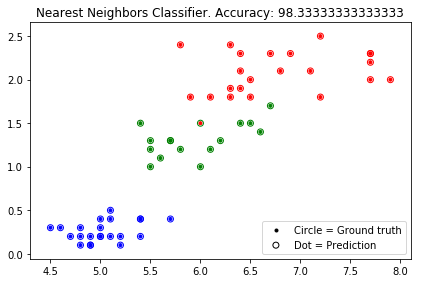

In [49]:
# -------- Nearest Neighbors ----------
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier", 5)

C:\Users\liuda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\liuda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\liuda\Anaconda3\lib\sit

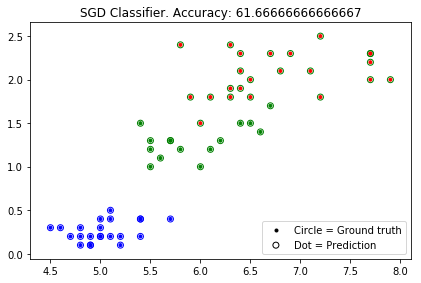

In [50]:
# ---------- SGD Classifier -----------------
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(SGDClassifier())
run_model(model, "SGD Classifier", 6)

C:\Users\liuda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


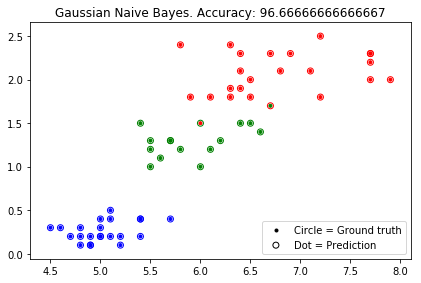

In [51]:
# --------- Gaussian Naive Bayes ---------
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
run_model(model, "Gaussian Naive Bayes", 7)

C:\Users\liuda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\liuda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


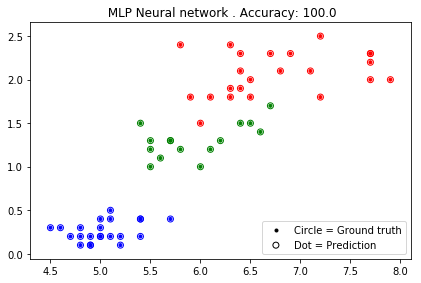

In [52]:
# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
run_model(model, " MLP Neural network ", 8)